<a href="https://colab.research.google.com/github/thanhnguyen2612/diveintocode-ml/blob/master/ML_sprint6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Decision Tree

In [334]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [335]:
import statistics

class ScratchDecesionTreeClassifierDepth1():
    """
    Depth 1 decision tree classifier scratch implementation
    Parameters
    ----------
    verbose : bool
      True to output the learning process
    """
    def __init__(self, verbose=False):
        # Record hyperparameters as attributes
        self.verbose = verbose
    
    def _gini_index(self, c_samples, n_samples):
        """
        @Params:
            c_samples: list of number of samples belonging to a class
            n_samples: total number of samples
        @Return:
            Gini impurity index
        """
        return 1 - sum((c / n_samples) ** 2 for c in c_samples)
    
    def _information_gain(self, l_samples, r_samples):
        """
        @Params:
            l_samples: left node distribution
            r_samples: right node distribution
        @Return:
            Information gain index
        """
        n_l_samples = sum(l_samples)
        n_r_samples = sum(r_samples)
        n_samples = n_l_samples + n_r_samples

        I_left = gini_index(l_samples, n_l_samples)
        I_right = gini_index(r_samples, n_r_samples)
        I_parent = gini_index(l_samples + r_samples, n_samples)
        
        IG = I_parent - n_l_samples/n_samples*I_left - n_r_samples/n_samples*I_right
        return IG
    
    def _choose_threshold(self, X, y):
        """
        @Params:
            X: a column feature
            y: labels
        @Return:
            Best information gain and corresponding threshold
        """
        info_gains = []
        thresholds = np.unique(X)

        for threshold in thresholds:
            l_node = y[X < threshold]
            r_node = y[X >= threshold]

            if len(l_node) == 0 or len(r_node) == 0:
                continue

            l_samples = np.array([(l_node == self.ylabel[0]).sum(),
                                  (l_node == self.ylabel[1]).sum()])
            r_samples = np.array([(r_node == self.ylabel[0]).sum(),
                                  (r_node == self.ylabel[1]).sum()])
            info_gains.append(self._information_gain(l_samples, r_samples))

        return max(info_gains), thresholds[info_gains.index(max(info_gains))]

    def fit(self, X, y):
        """
        Learn the decision tree classifier
        Parameters
        ----------
        X : The following forms of ndarray, shape (n_samples, n_features)
            Features of training data
        y : The following form of ndarray, shape (n_samples,)
            Correct answer value of training data
        """
        self.ylabel = np.unique(y)

        info_gains = []
        thresholds = []
        for i in range(X.shape[1]):
            info_gain, threshold = self._choose_threshold(X[:,i], y)
            info_gains.append(info_gain)
            thresholds.append(threshold)

            # Output the learning process when verbose is set to True
            if self.verbose:
                print(f"Column {i}: InfoGain({info_gain}) - Threshold({threshold})")
        
        self.info_gain = max(info_gains)
        self.index = info_gains.index(self.info_gain)
        self.threshold = thresholds[self.index]
        self.l_label = statistics.mode(y[X[:, self.index] < self.threshold])
        self.r_label = statistics.mode(y[X[:, self.index] >= self.threshold])

    def predict(self, X):
        """
        Estimate the label using a decision tree classifier
        """
        return np.where(X[:, self.index] >= self.threshold, self.r_label, self.l_label)

## [Problem 1] Function for finding impureness

In [336]:
def gini_index(c_samples, n_samples):
    """
    @Params:
        c_samples: list of number of samples belonging to a class
        n_samples: total number of samples
    @Return:
        Gini impurity index
    """
    gini = 1 - sum((c / n_samples) ** 2 for c in c_samples)
    return gini

In [337]:
print(gini_index([15, 15], 30))
print(gini_index([15, 15, 15], 45))
print(gini_index([18, 12], 30))
print(gini_index([30, 0], 30))

0.5
0.6666666666666667
0.48
0.0


## [Problem 2] Function for finding information gain

In [338]:
def information_gain(l_samples, r_samples):
    """
    @Params:
        l_samples: left node distribution
        r_samples: right node distribution
    @Return:
        Information gain index
    """
    n_l_samples = sum(l_samples)
    n_r_samples = sum(r_samples)
    n_samples = n_l_samples + n_r_samples

    I_left = gini_index(l_samples, n_l_samples)
    I_right = gini_index(r_samples, n_r_samples)
    I_parent = gini_index(l_samples + r_samples, n_samples)
    
    IG = I_parent - n_l_samples/n_samples*I_left - n_r_samples/n_samples*I_right
    return IG

In [339]:
information_gain(np.array([10, 30]), np.array([20, 5]))

0.14319526627218937

## [Problem 3] Learning

In [340]:
def choose_threshold(X, y):
    ylabel = np.unique(y)
    info_gains = []
    thresholds = np.unique(X)

    for threshold in thresholds[1:]:
        l_node = y[X < threshold]
        r_node = y[X >= threshold]

        l_samples = np.array([(l_node == ylabel[0]).sum(),
                                (l_node == ylabel[1]).sum()])
        r_samples = np.array([(r_node == ylabel[0]).sum(),
                                (r_node == ylabel[1]).sum()])
        info_gains.append(information_gain(l_samples, r_samples))

    return max(info_gains), thresholds[info_gains.index(max(info_gains))]

def train(X, y):
    info_gains = []
    thresholds = []
    for i in range(X.shape[1]):
        info_gain, threshold = choose_threshold(X[:,i], y)
        info_gains.append(info_gain)
        thresholds.append(threshold)
    
    best_info_gain = max(info_gains)
    index = info_gains.index(best_info_gain)
    threshold = thresholds[index]
    r_label = statistics.mode(y[X[:, index] >= threshold])
    l_label = statistics.mode(y[X[:, index] < threshold])
    return best_info_gain, threshold, l_label, r_label, index

### Load Simple Dataset 2 and compare with Sklearn

In [341]:
X = np.array([
    [-0.44699 , -2.8073  ],[-1.4621  , -2.4586  ],
    [ 0.10645 ,  1.9242  ],[-3.5944  , -4.0112  ],
    [-0.9888  ,  4.5718  ],[-3.1625  , -3.9606  ],
    [ 0.56421 ,  0.72888 ],[-0.60216 ,  8.4636  ],
    [-0.61251 , -0.75345 ],[-0.73535 , -2.2718  ],
    [-0.80647 , -2.2135  ],[ 0.86291 ,  2.3946  ],
    [-3.1108  ,  0.15394 ],[-2.9362  ,  2.5462  ],
    [-0.57242 , -2.9915  ],[ 1.4771  ,  3.4896  ],
    [ 0.58619 ,  0.37158 ],[ 0.6017  ,  4.3439  ],
    [-2.1086  ,  8.3428  ],[-4.1013  , -4.353   ],
    [-1.9948  , -1.3927  ],[ 0.35084 , -0.031994],
    [ 0.96765 ,  7.8929  ],[-1.281   , 15.6824  ],
    [ 0.96765 , 10.083   ],[ 1.3763  ,  1.3347  ],
    [-2.234   , -2.5323  ],[-2.9452  , -1.8219  ],
    [ 0.14654 , -0.28733 ],[ 0.5461  ,  5.8245  ],
    [-0.65259 ,  9.3444  ],[ 0.59912 ,  5.3524  ],
    [ 0.50214 , -0.31818 ],[-3.0603  , -3.6461  ],
    [-6.6797  ,  0.67661 ],[-2.353   , -0.72261 ],
    [ 1.1319  ,  2.4023  ],[-0.12243 ,  9.0162  ],
    [-2.5677  , 13.1779  ],[ 0.057313,  5.4681  ],
])
y = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
              1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])
print(X.shape, y.shape)

(40, 2) (40,)


In [342]:
info_gain, threshold, l_label, r_label, idx = train(X, y)
print(f"Feature {idx}: InfoGain({info_gain}) - Threshold ({threshold})")

Feature 1: InfoGain(0.07680250783699061) - Threshold (4.5718)


In [343]:
from sklearn.tree import DecisionTreeClassifier

sklearn_tree = DecisionTreeClassifier(max_depth=1, random_state=0)
sklearn_tree.fit(X, y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=1, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [344]:
f, t = sklearn_tree.tree_.feature[0], sklearn_tree.tree_.threshold[0]
print(f"Feature {f}: Threshold {t}")

Feature 1: Threshold 4.962100028991699


## [Problem 4] Estimate

In [345]:
def predict(X, idx, threshold, l_label, r_label):
    return np.where(X[:, idx] >= threshold, r_label, l_label)

In [346]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=0)

In [347]:
info_gain, threshold, l_label, r_label, idx = train(X, y)
print(f"Feature {idx}: InfoGain({info_gain}) - Threshold ({threshold})")
y_pred = predict(X_val, idx, threshold, l_label, r_label)
print(classification_report(y_val, y_pred))

Feature 1: InfoGain(0.07680250783699061) - Threshold (4.5718)
              precision    recall  f1-score   support

           0       0.50      0.75      0.60         4
           1       0.50      0.25      0.33         4

    accuracy                           0.50         8
   macro avg       0.50      0.50      0.47         8
weighted avg       0.50      0.50      0.47         8



In [348]:
sklearn_tree = DecisionTreeClassifier(max_depth=1, random_state=0)
sklearn_tree.fit(X_train, y_train)
y_pred = sklearn_tree.predict(X_val)
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.50      1.00      0.67         4
           1       0.00      0.00      0.00         4

    accuracy                           0.50         8
   macro avg       0.25      0.50      0.33         8
weighted avg       0.25      0.50      0.33         8



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## [Problem 5] Learning and estimation

In [349]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

def preprocess(X, y, preprocessor=None, test_size=0.2, random_state=None):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=test_size,
                                                      random_state=random_state)
    if preprocessor is not None:
        X_train = preprocessor.fit_transform(X_train)
        X_val = preprocessor.transform(X_val)
    return X_train, X_val, y_train, y_val

def train_and_validate(X_train, X_val, y_train, y_val, model):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    print(classification_report(y_val, y_pred))
    sns.heatmap(confusion_matrix(y_val, y_pred), cmap=plt.cm.Blues, annot=True)

In [350]:
X_train, X_val, y_train, y_val = preprocess(X, y, random_state=0)

Column 0: InfoGain(0.03333333333333338) - Threshold(-3.1108)
Column 1: InfoGain(0.0925925925925925) - Threshold(8.4636)
              precision    recall  f1-score   support

           0       0.50      1.00      0.67         4
           1       0.00      0.00      0.00         4

    accuracy                           0.50         8
   macro avg       0.25      0.50      0.33         8
weighted avg       0.25      0.50      0.33         8



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


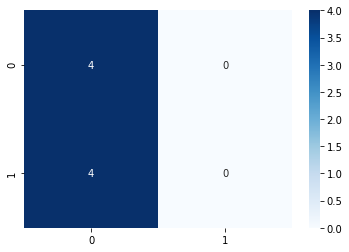

In [351]:
scratch_clf = ScratchDecesionTreeClassifierDepth1(verbose=True)
train_and_validate(X_train, X_val, y_train, y_val, scratch_clf)

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.50      1.00      0.67         4
           1       0.00      0.00      0.00         4

    accuracy                           0.50         8
   macro avg       0.25      0.50      0.33         8
weighted avg       0.25      0.50      0.33         8



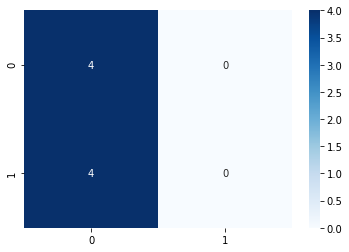

In [352]:
sklearn_clf = DecisionTreeClassifier(max_depth=1, random_state=0)
train_and_validate(X_train, X_val, y_train, y_val, sklearn_clf)

## [Problem 6] Visualization of decision area

In [353]:
from matplotlib.colors import ListedColormap
from matplotlib.patches import Patch

def decision_region(X, y, model, step=0.01,
                    title="Decision region",
                    xlabel="xlabel",
                    ylabel="ylabel",
                    targets=[0, 1],
                    figsize=(12, 12)):
    # Setting
    scatter_colors = ["red", "blue"]
    contourf_colors = ["pink", "skyblue"]
    n_class = len(targets)

    mesh_f0, mesh_f1 = np.meshgrid(np.arange(np.min(X[:,0]) - 0.5, np.max(X[:,0]) + 0.5, step),
                                   np.arange(np.min(X[:,1]) - 0.5, np.max(X[:,1]) + 0.5, step))
    mesh = np.c_[np.ravel(mesh_f0), np.ravel(mesh_f1)]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)
    
    # Plot
    plt.figure(figsize=figsize)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, y_pred, n_class - 1, cmap=ListedColormap(contourf_colors))
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class - 1, colors='y', alpha=0.5)

    for i, target in enumerate(set(y)):
        plt.scatter(X[y == target][:, 0], X[y == target][:, 1],
                    s=80, color=scatter_colors[i], label=targets[i], marker='o')
    patches = [Patch(color=scatter_colors[i], label=targets[i]) for i in range(n_class)]
    plt.legend(handles=patches)
    plt.legend()
    plt.show()

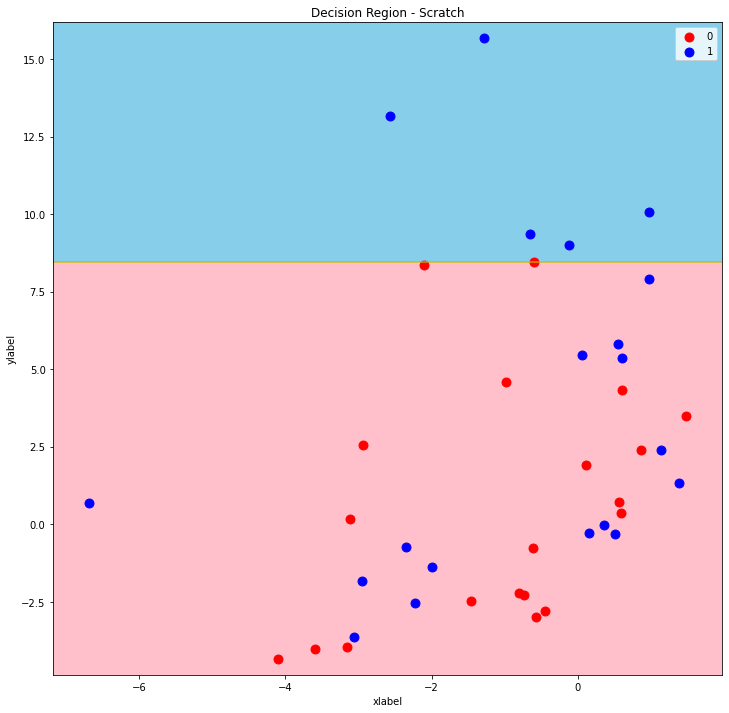

In [354]:
decision_region(X, y, scratch_clf, title="Decision Region - Scratch")

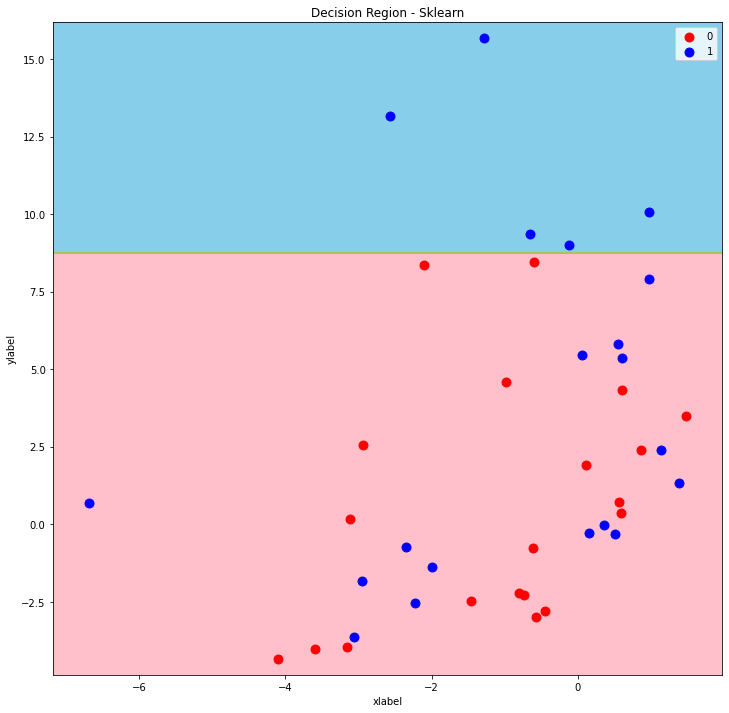

In [355]:
decision_region(X, y, sklearn_clf, title="Decision Region - Sklearn")

## [Problem 7] (Advance assignment) Creation of a decision tree classifier class with a depth of 2

In [356]:
class Node():
    """
    Depth 1 decision tree classifier scratch implementation
    Parameters
    ----------
    verbose : bool
      True to output the learning process
    """
    def __init__(self, max_depth=-1, verbose=False):
        # Record hyperparameters as attributes
        self.max_depth = max_depth
        self.feature_index = None
        self.l_node = None
        self.r_node = None
        self.verbose = verbose
    
    def _gini_index(self, c_samples, n_samples):
        """
        @Params:
            c_samples: list of number of samples belonging to a class
            n_samples: total number of samples
        @Return:
            Gini impurity index
        """
        return 1 - sum((c / n_samples) ** 2 for c in c_samples)
    
    def _information_gain(self, l_samples, r_samples):
        """
        @Params:
            l_samples: left node distribution
            r_samples: right node distribution
        @Return:
            Information gain index
        """
        n_l_samples = sum(l_samples)
        n_r_samples = sum(r_samples)
        n_samples = n_l_samples + n_r_samples

        I_left = gini_index(l_samples, n_l_samples)
        I_right = gini_index(r_samples, n_r_samples)
        I_parent = gini_index(l_samples + r_samples, n_samples)
        
        IG = I_parent - n_l_samples/n_samples*I_left - n_r_samples/n_samples*I_right
        return IG
    
    def _choose_threshold(self, X, y):
        """
        @Params:
            X: a column feature
            y: labels
        @Return:
            Best information gain and corresponding threshold
        """
        info_gains = []
        thresholds = np.unique(X)
        thresholds = thresholds[thresholds > thresholds.min()]

        for threshold in thresholds:
            l_node = y[X < threshold]
            r_node = y[X >= threshold]

            l_samples = np.array([(l_node == self.ylabel[0]).sum(),
                                  (l_node == self.ylabel[1]).sum()])
            r_samples = np.array([(r_node == self.ylabel[0]).sum(),
                                  (r_node == self.ylabel[1]).sum()])
            info_gains.append(self._information_gain(l_samples, r_samples))

        return max(info_gains), thresholds[info_gains.index(max(info_gains))]

    def fit(self, X, y, depth=0):
        """
        Learn the decision tree classifier
        Parameters
        ----------
        X : The following forms of ndarray, shape (n_samples, n_features)
            Features of training data
        y : The following form of ndarray, shape (n_samples,)
            Correct answer value of training data
        """
        self.ylabel = np.unique(y)

        # End if belong to 1 class, no more split
        if len(self.ylabel) == 1:
            self.label = self.ylabel[0]
            return None

        if self.max_depth == 0:
            self.label = statistics.mode(y)
            return None

        info_gains = []
        thresholds = []
        for i in range(X.shape[1]):
            info_gain, threshold = self._choose_threshold(X[:,i], y)
            info_gains.append(info_gain)
            thresholds.append(threshold)

            # Output the learning process when verbose is set to True
            if self.verbose:
                print("Depth", depth,
                      "Feature", i,
                      "Threshold", threshold,
                      "Info_Gain", info_gain)
        
        self.info_gain = max(info_gains)
        self.feature_index = info_gains.index(self.info_gain)
        self.threshold = thresholds[self.feature_index]

        # Split left node, recursive
        X_left = X[X[:, self.feature_index] < self.threshold]
        y_left = y[X[:, self.feature_index] < self.threshold]
        self.l_node = Node(self.max_depth - 1, self.verbose)
        self.l_node.fit(X_left, y_left, depth + 1)

        # Split right node, recursive
        X_right = X[X[:, self.feature_index] >= self.threshold]
        y_right = y[X[:, self.feature_index] >= self.threshold]
        self.r_node = Node(self.max_depth - 1, self.verbose)
        self.r_node.fit(X_right, y_right, depth + 1)

    def predict(self, X):
        """
        Estimate the label using a decision tree classifier
        """
        if self.feature_index is None or self.max_depth == 0:
            return self.label
        
        if X[self.feature_index] < self.threshold:
            return self.l_node.predict(X)
        return self.r_node.predict(X)

class ScratchDecisionTreeClassifier():
    def __init__(self, max_depth=-1, verbose=False):
        self.max_depth = max_depth
        self.verbose = verbose
        self.root = Node(max_depth=max_depth, verbose=verbose)
    
    def fit(self, X, y):
        self.root.fit(X, y)
    
    def predict(self, X):
        y_pred = np.array([self.root.predict(x) for x in X])
        return y_pred

Depth 0 Feature 0 Threshold -3.0603 Info_Gain 0.03333333333333338
Depth 0 Feature 1 Threshold 9.0162 Info_Gain 0.0925925925925925
Depth 1 Feature 0 Threshold 0.057313 Info_Gain 0.04363753731945469
Depth 1 Feature 1 Threshold -3.6461 Info_Gain 0.041495198902606334
              precision    recall  f1-score   support

           0       0.67      0.50      0.57         4
           1       0.60      0.75      0.67         4

    accuracy                           0.62         8
   macro avg       0.63      0.62      0.62         8
weighted avg       0.63      0.62      0.62         8



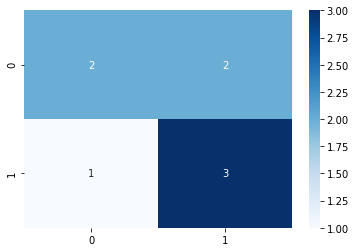

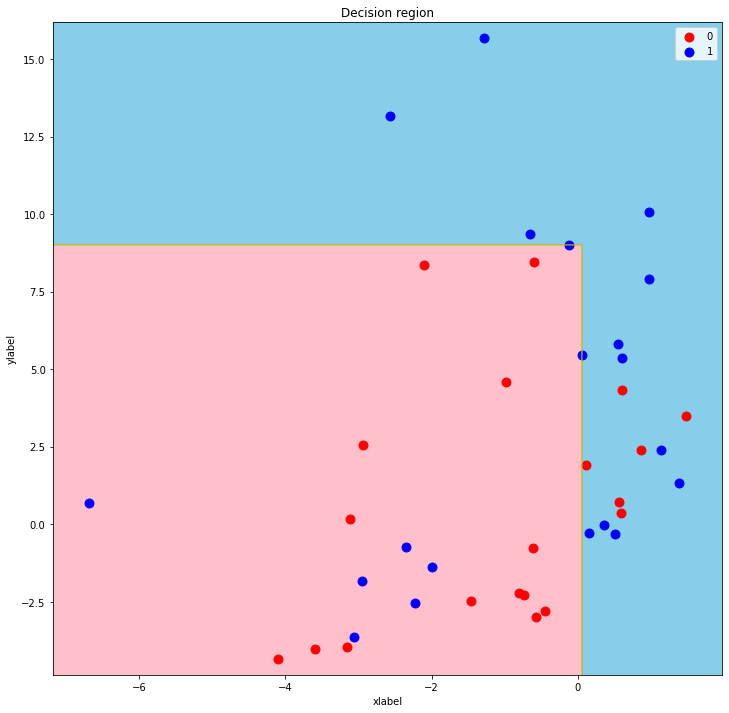

In [357]:
scratch_clf = ScratchDecisionTreeClassifier(max_depth=2, verbose=True)
train_and_validate(X_train, X_val, y_train, y_val, scratch_clf)
decision_region(X, y, scratch_clf)

              precision    recall  f1-score   support

           0       0.67      0.50      0.57         4
           1       0.60      0.75      0.67         4

    accuracy                           0.62         8
   macro avg       0.63      0.62      0.62         8
weighted avg       0.63      0.62      0.62         8



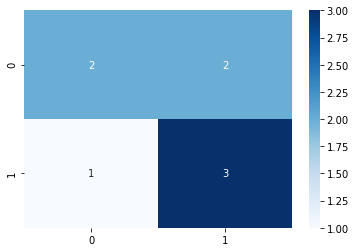

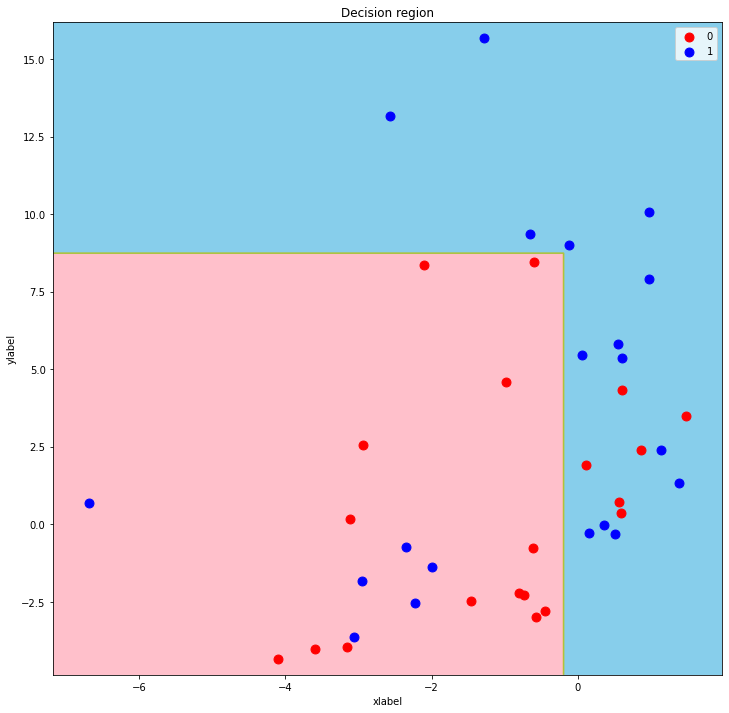

In [358]:
sklearn_clf = DecisionTreeClassifier(max_depth=2, random_state=0)
train_and_validate(X_train, X_val, y_train, y_val, sklearn_clf)
decision_region(X, y, sklearn_clf)

## [Problem 8] (Advance assignment) Creation of decision tree classifier class with unlimited depth

              precision    recall  f1-score   support

           0       0.75      0.75      0.75         4
           1       0.75      0.75      0.75         4

    accuracy                           0.75         8
   macro avg       0.75      0.75      0.75         8
weighted avg       0.75      0.75      0.75         8



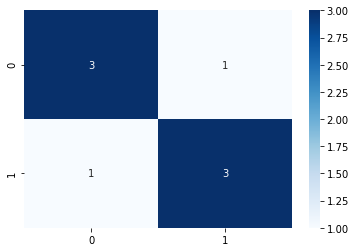

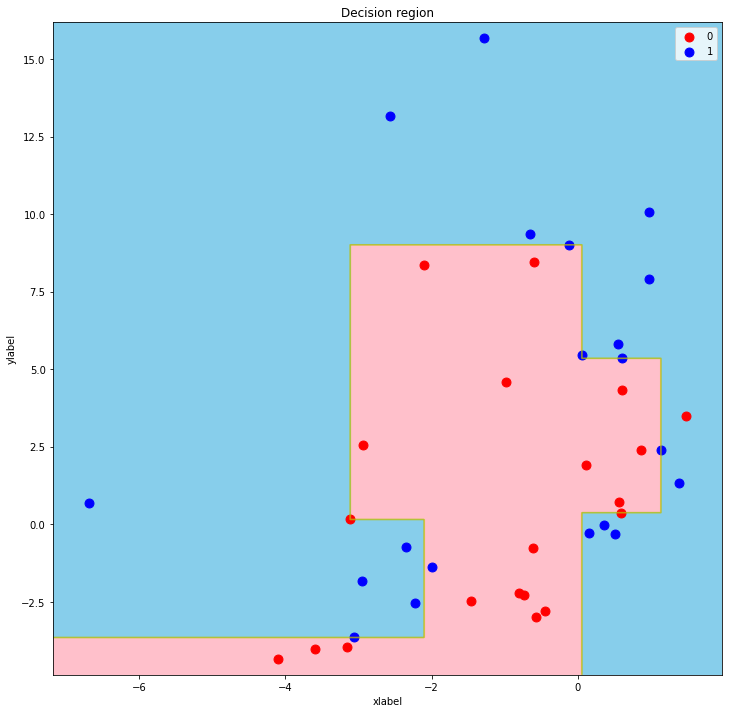

In [359]:
scratch_clf = ScratchDecisionTreeClassifier()
train_and_validate(X_train, X_val, y_train, y_val, scratch_clf)
decision_region(X, y, scratch_clf)

              precision    recall  f1-score   support

           0       0.75      0.75      0.75         4
           1       0.75      0.75      0.75         4

    accuracy                           0.75         8
   macro avg       0.75      0.75      0.75         8
weighted avg       0.75      0.75      0.75         8



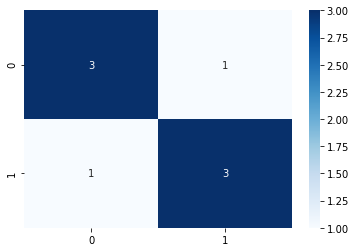

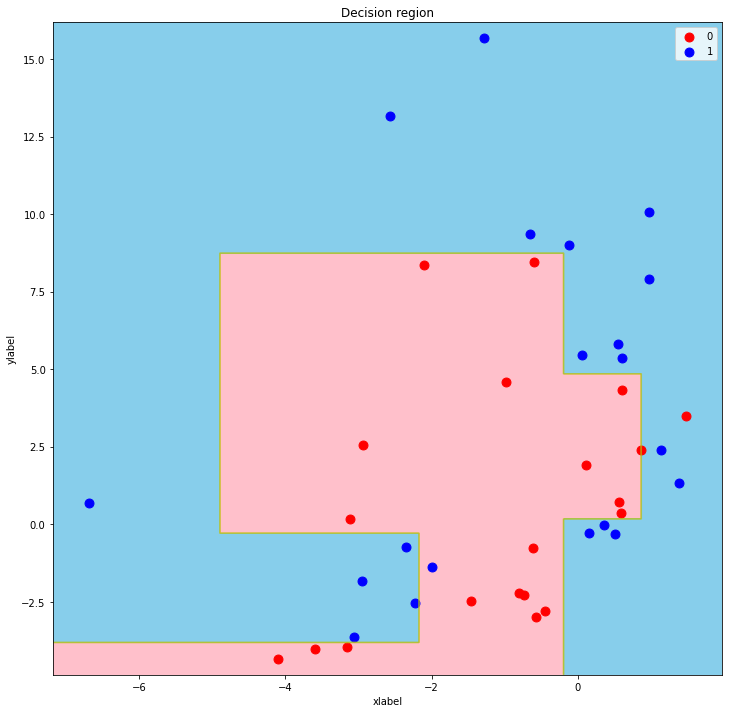

In [360]:
sklearn_clf = DecisionTreeClassifier(random_state=0)
train_and_validate(X_train, X_val, y_train, y_val, sklearn_clf)
decision_region(X, y, sklearn_clf)